<a href="https://colab.research.google.com/github/NUELBUNDI/Principles_Data_Science/blob/main/PDS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRINCIPLES OF DATA SCIENCE MODULE PROJECT:**
1.   **Student Name    : LEE BUND1**
2.   **Student No      : 102586**









In [705]:
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels
import missingno as mn
import plotly.offline as pyo
import plotly.express as px
import datetime
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')






##INTRODUCTION

The purpose of the project is to perform analysis on sales data.I will perform the analysis is several steps as a indicated below.


1.   Read the data from the source.
2.   Visualize the data.
3.   Clean the data.
4.   Perform  basic EDA- to get basic insights about the data.
5.   Develop  machine learning models to get deeper insight of the data.

The data used for analysis sample sales data (sources = https://www.kaggle.com/)

**NB**.Attention **Dr.Chris**(In class i was using data set from employers company ,however, after consulting my superiors i was asked not to use it, so i have looked for a new data for this project)

In [706]:
# Read csv File.

df= pd.read_csv("https://raw.githubusercontent.com/NUELBUNDI/PDS_PROJECT/main/Salesdata.csv",encoding="Latin-1")

# **SECTION 1 : CLEANING DATA**

In [707]:
# read first five rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,$95.70,2,"$2,871.00",2/24/2003 0:00,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,$81.35,5,"$2,765.90",05-07-03 0:00,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,$94.74,2,"$3,884.34",07-01-03 0:00,Shipped,3,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,$83.26,6,"$3,746.70",8/25/2003 0:00,Shipped,3,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,$100.00,14,"$5,205.27",10-10-03 0:00,Shipped,4,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [708]:
df.shape

(2823, 23)

In [709]:
# Convert the Columns to lower case and Remove spaces of uniformity

df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'productline', 'msrp',
       'productcode', 'customername', 'phone', 'addressline1', 'addressline2',
       'city', 'state', 'postalcode', 'country', 'territory',
       'contactlastname', 'contactfirstname', 'dealsize'],
      dtype='object')

In [710]:
# Remove $ and , in columns sales and priceeach

# Create a function to remove $ and ,
def convertfunc(x):
  if isinstance(x, str):
    return(x.replace('$', '').replace(',', ''))
  return(x)
  
# Apply the function.

df['priceeach']=df['priceeach'].apply(lambda x: convertfunc(x)).astype(float)
df['sales']=df['sales'].apply(lambda x: convertfunc(x)).astype(float)
df.head(3)


,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-03 0:00,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-03 0:00,Shipped,3,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


In [711]:
# convert order date to pd date time frame and  extract month and year from the orderdate

df['orderdate']=pd.to_datetime(df['orderdate'])
df['ordermonth']=df['orderdate'].dt.month
df['orderyear']=df['orderdate'].dt.year

df.head(2)


,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,ordermonth,orderyear
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2,2003
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,5,2003


In [712]:
# Arrange dataframe columns

cols=list(df.columns.values)

df=df[['ordernumber', 'quantityordered','priceeach', 'orderlinenumber', 'sales', 'orderdate','ordermonth','orderyear','status', 'qtr_id', 'productline', 'msrp', 'productcode', 'customername','phone', 'addressline1', 'city', 'state', 'postalcode', 'country', 'contactlastname', 'contactfirstname', 'dealsize']]


In [713]:
# Create a column to assign the name of the quarter in a year based on the ordermonth

df['quarter']=df['ordermonth'].apply(lambda x :'Q1' if x<=3 else('Q2' if (x>3 and x<=6) else ('Q3' if (x>6 and x<=8) else 'Q4')))
df.head(4)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,ordermonth,orderyear,status,qtr_id,productline,msrp,productcode,customername,phone,addressline1,city,state,postalcode,country,contactlastname,contactfirstname,dealsize,quarter
0,10107,30,95.70,2,2871.00,2003-02-24,2,2003,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small,Q1
1,10121,34,81.35,5,2765.90,2003-05-07,5,2003,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul,Small,Q2
2,10134,41,94.74,2,3884.34,2003-07-01,7,2003,Shipped,3,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,Da Cunha,Daniel,Medium,Q3
3,10145,45,83.26,6,3746.70,2003-08-25,8,2003,Shipped,3,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Young,Julie,Medium,Q3


In [714]:
print(f' The Shape of the Dataframe  in Rows and Columns respectively as  {df.shape}')

 The Shape of the Dataframe  in Rows and Columns respectively as  (2823, 24)


In [715]:
# Check for the Missing Values as value of Mean Percentage per rows so as to evaluate their relevance 

d_types=df.dtypes
d_missing=df.isnull().mean().round(4)*100

# converting to data frames

details1=pd.DataFrame(d_types,columns=['DTYPE'])
details2=pd.DataFrame(d_missing,columns=['MISSING'])

# Combine the dataframes
combine_df=pd.concat([details1,details2],axis=1)
combine_df.sort_values(by='MISSING',ascending=False)


,DTYPE,MISSING
state,object,52.64
postalcode,object,2.69
ordernumber,int64,0.00
quantityordered,int64,0.00
dealsize,object,0.00
contactfirstname,object,0.00
contactlastname,object,0.00
country,object,0.00
city,object,0.00
addressline1,object,0.00


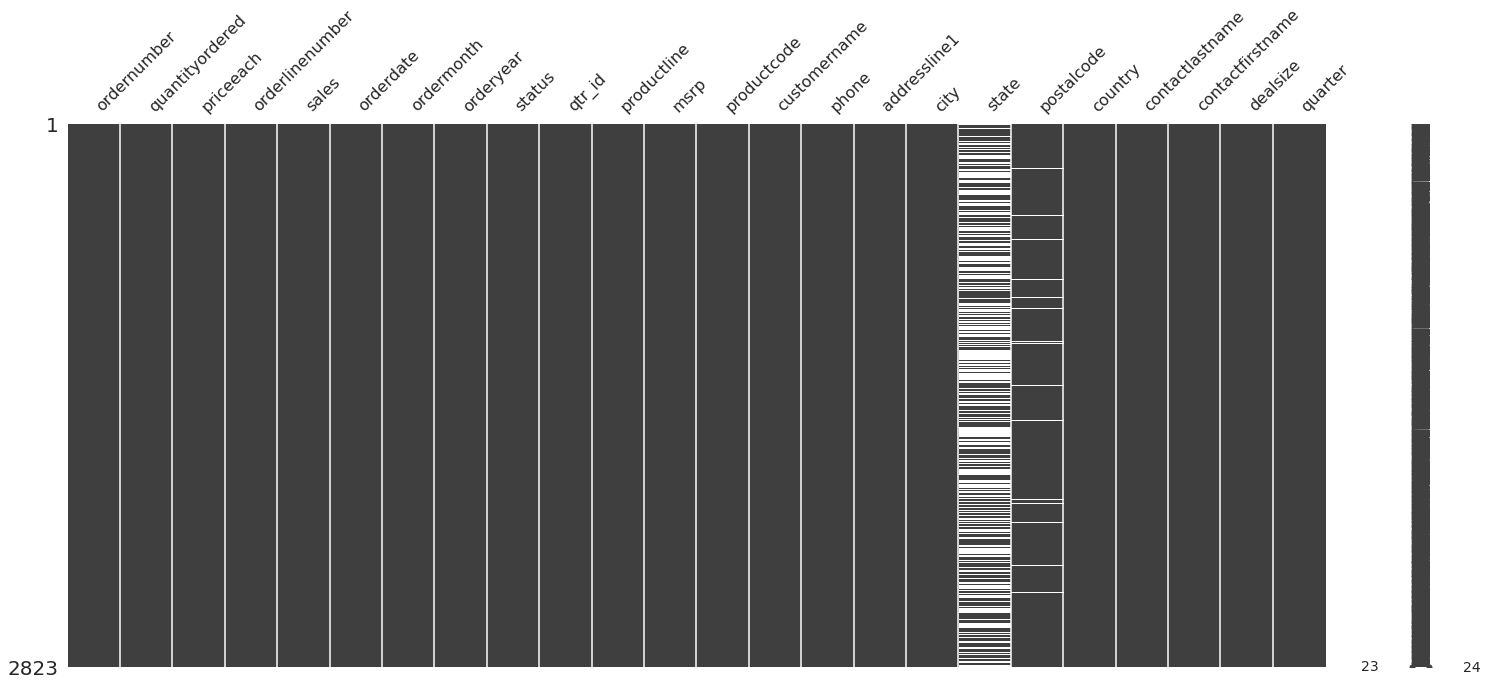

In [716]:
#Visualize the missing values

mn.matrix(df)

In [717]:
# Check for duplicates

df.duplicated( keep='first').sum()

0

# **SECTION 2:** **EXPLORATORY DATA ANALYSIS**

In [718]:
df.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,ordermonth,orderyear,qtr_id,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,7.092455,2003.81509,2.717676,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,3.656633,0.69967,1.203878,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,2003.00000,1.000000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,4.000000,2003.00000,2.000000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,8.000000,2004.00000,3.000000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,11.000000,2004.00000,4.000000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,12.000000,2005.00000,4.000000,214.000000


In [719]:
# Check How Many Unique Values we have in the Data

for col in df.columns:
  print(f' Number of Unique Values in {col} are  {df[col].nunique()}')

 Number of Unique Values in ordernumber are  307
 Number of Unique Values in quantityordered are  58
 Number of Unique Values in priceeach are  1016
 Number of Unique Values in orderlinenumber are  18
 Number of Unique Values in sales are  2763
 Number of Unique Values in orderdate are  252
 Number of Unique Values in ordermonth are  12
 Number of Unique Values in orderyear are  3
 Number of Unique Values in status are  6
 Number of Unique Values in qtr_id are  4
 Number of Unique Values in productline are  7
 Number of Unique Values in msrp are  80
 Number of Unique Values in productcode are  109
 Number of Unique Values in customername are  92
 Number of Unique Values in phone are  91
 Number of Unique Values in addressline1 are  92
 Number of Unique Values in city are  73
 Number of Unique Values in state are  16
 Number of Unique Values in postalcode are  73
 Number of Unique Values in country are  19
 Number of Unique Values in contactlastname are  77
 Number of Unique Values in c

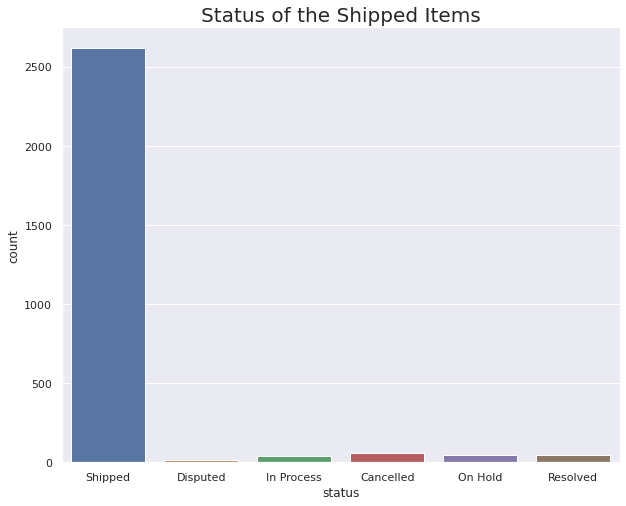

In [720]:
# Status of the Shipped Items.

plt.figure(figsize=(10,8))
sns.countplot(df['status'],label="Count")
plt.title('Status of the Shipped Items',fontsize=20)
plt.show()   

                 sales
status                
Shipped     9291501.08
Cancelled    194487.48
On Hold      178979.19
Resolved     150718.28
In Process   144729.96
Disputed      72212.86


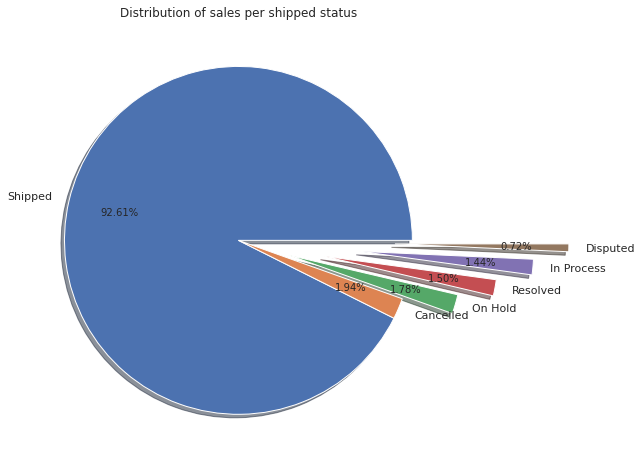

In [721]:
# Values in sales of the status of the shipped terms.


table=pd.pivot_table(df,index='status',aggfunc={'sales':np.sum}).sort_values(by='sales',ascending=False)
print(table)

# value=[]
# [value.append(x.round(0)) for x in table['sales'].unique()]
# autopcti=lambda p:f'{p:.2f}%, {p*sum(value)/100 :.0f}$

autopcti=lambda p:f'{p:.2f}%'

plt.figure(figsize=(12,8))
plt.title('Distribution of sales per shipped status')
plt.pie(table['sales'],labels=table.index,autopct=autopcti,explode=[0,0,0.3,0.5,0.7,0.9],shadow=True,pctdistance=0.7)
plt.show()

In [722]:
# Drop all the Cancelled and Disputed order in our Data Frame.

cols=['Cancelled','Disputed']

for col in cols:
  df.drop(df[df['status']==col].index,inplace=True)

df['status'].unique()

array(['Shipped', 'In Process', 'On Hold', 'Resolved'], dtype=object)

In [723]:
df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,ordermonth,orderyear,status,qtr_id,productline,msrp,productcode,customername,phone,addressline1,city,state,postalcode,country,contactlastname,contactfirstname,dealsize,quarter
0,10107,30,95.70,2,2871.0,2003-02-24,2,2003,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small,Q1
1,10121,34,81.35,5,2765.9,2003-05-07,5,2003,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul,Small,Q2


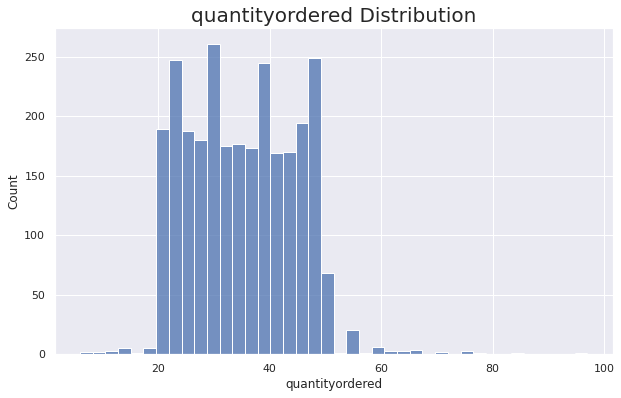

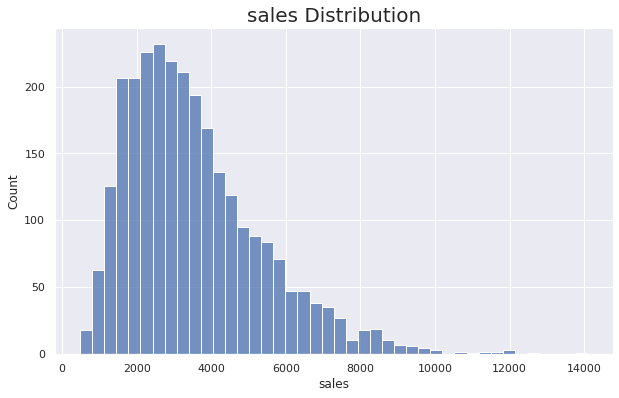

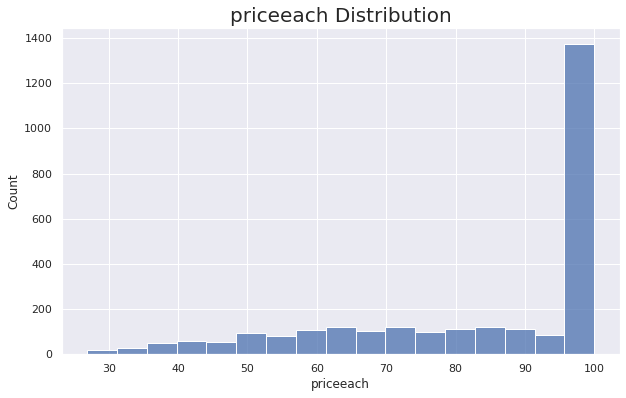

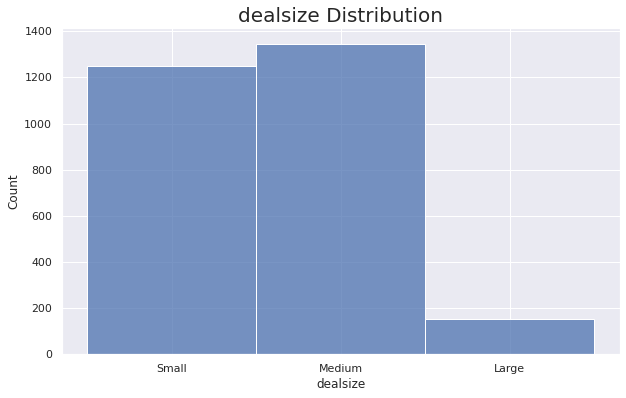

In [724]:
# Ploting  Distribution  of the attributes in the below list-"variables"

variable=['quantityordered','sales','priceeach','dealsize']

for var in variable:
  plt.figure(figsize=(10,6))
  sns.set_style('darkgrid')
  sns.histplot(df[var])
  plt.title(f'{var} Distribution',fontsize= 20)
  plt.xlabel(f'{var}')
  plt.ylabel('Count')
  plt.show()

   

From the above Histo plots.

1.   We see that majority of the orders range from 20 to  50 units--> we can infere majority of the orders are bulker.
2.   The Majority of orders are for price $100.

1.   The Sales are skwed to the Left.
2.   The Medium Dealsize is highest No. of frequency in the distribution.










In [725]:
# Compare Sales  and the Quantity Order.

sales_quantity=df.groupby('productline')[['quantityordered','sales']].sum().reset_index()
sales_quantity

,productline,quantityordered,sales
0,Classic Cars,33325,3834359.98
1,Motorcycles,11404,1134566.44
2,Planes,10249,935727.02
3,Ships,7467,654701.08
4,Trains,2670,221161.05
5,Trucks and Buses,10777,1127789.84
6,Vintage Cars,20540,1857623.10


In [726]:
customdata=sales_quantity

bar_data1 = go.Bar(
          x = sales_quantity['productline'],
          y = sales_quantity['quantityordered'],
          name = 'quantityordered',
          text = sales_quantity['quantityordered'],
          texttemplate = '%{text:.2s}',
          textposition = 'inside',
          yaxis = 'y1',
          offsetgroup=1,
          marker=dict(color=' #7F8C8D'),
          customdata=sales_quantity[['productline','quantityordered','sales']],
          hovertemplate =
          '<br><b>Product</b>: %{customdata[0]}<br><extra></extra>'+
          '<b>ordered</b>: %{customdata[1]:,.0f}'
          )

bar_data2 = go.Bar(
          x = sales_quantity['productline'],
          y = sales_quantity['sales'],
          name = 'Sales',
          text = sales_quantity['sales'],
          texttemplate = '%{text:.2s}',
          textposition = 'auto',
          yaxis = 'y2',
          offsetgroup=2,
          marker=dict(color='#B45513'),
          customdata=sales_quantity[['productline','quantityordered','sales']],
          hovertemplate =
          '<br><b>Product</b>: %{customdata[0]}<br><extra></extra>'+
          '<b>Total Sales</b>: %{customdata[2]:,.0f}'
          )

data = [bar_data1, bar_data2]

layout = go.Layout(title={'text': 'Sales of ordered Quantity',
                          'y': 0.93,
                          'x': 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   titlefont={'family': 'Oswald', 
                              'color': 'rgb(230, 34, 144)',
                              'size': 25},
                              hovermode='x',
                              height=550,
                     xaxis=dict(title='<b>Name of the Product</b>',
                            tick0=0,
                            dtick=1,
                            color='rgb(230, 34, 144)',
                            showline=True,
                            showgrid=True,
                            showticklabels=True,
                            linecolor='rgb(104, 204, 104)',
                            linewidth=2,
                            ticks='outside',
                            tickfont=dict(family='Arial',
                                size=12,
                                color='rgb(17, 37, 239)')
                            ),

                    yaxis=dict(title='<b>Quantity Ordered</b>',
                        color='rgb(230, 34, 144)',
                        showline=True,
                        showgrid=True,
                        showticklabels=True,
                        linecolor='rgb(104, 204, 104)',
                        linewidth=2,
                        ticks='outside',
                        tickfont=dict(family='Arial',
                            size=12,
                            color='rgb(17, 37, 239)')
                        
                        ),
                 yaxis2=dict(title='<b>sales</b>', 
                             overlaying='y', side='right',
                             color='rgb(230, 34, 144)',
                             showline=True,
                             showgrid=False,
                             showticklabels=True,
                            linecolor='rgb(104, 204, 104)',
                            linewidth=2,
                            ticks='outside',
                            tickfont=dict(family='Arial',
                                         size=12,
                                        color='rgb(17, 37, 239)') 
                            )
)

            
figure=go.Figure(data=data, layout=layout)

figure.show()

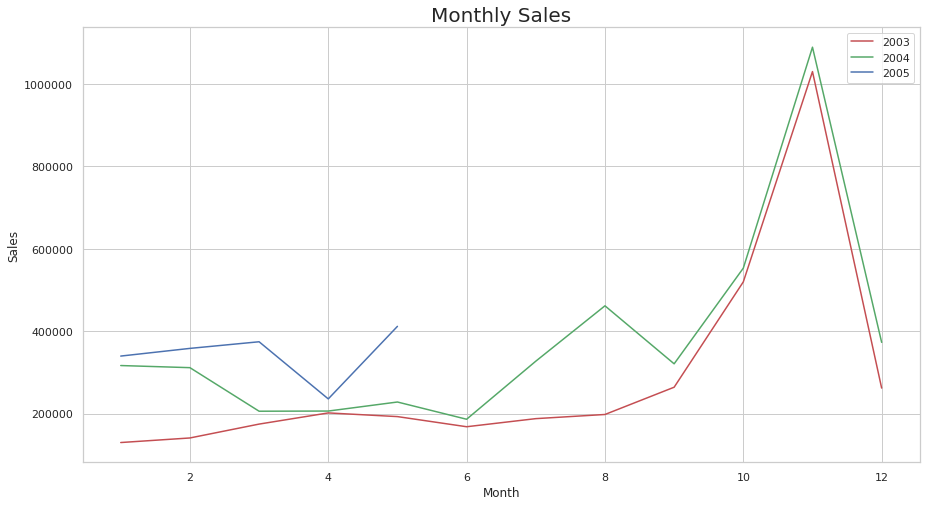

In [727]:
# Sales Trend Per Month

sales_trend=df.groupby(['ordermonth','orderyear']).agg({'sales':np.sum})
sales_trend=sales_trend.reset_index()
sales_trend.columns=['month','year','sale']


# plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
lp=sns.lineplot('month','sale',hue='year',data=sales_trend,palette=["r",'g','b'])
lp.legend(loc='upper right')
plt.title('Monthly Sales',fontsize=20)
plt.xlabel('Month')
plt.ticklabel_format(style='plain')
plt.ylabel('Sales')
plt.show()

In [728]:
# Calculate growth rate.

salesgrowth=sales_trend.sort_values(['year','month'],ascending=True)
salesgrowth.reset_index(drop=True,inplace=True)
salesgrowth['growthrate']=salesgrowth['sale'].pct_change()
salesgrowth



,month,year,sale,growthrate
0,1,2003,129753.60,NaN
1,2,2003,140836.19,0.085413
2,3,2003,174504.90,0.239063
3,4,2003,201609.55,0.155323
4,5,2003,192673.11,-0.044325
5,6,2003,168082.56,-0.127628
6,7,2003,187731.88,0.116903
7,8,2003,197809.30,0.053680
8,9,2003,263973.36,0.334484
9,10,2003,519580.05,0.968305


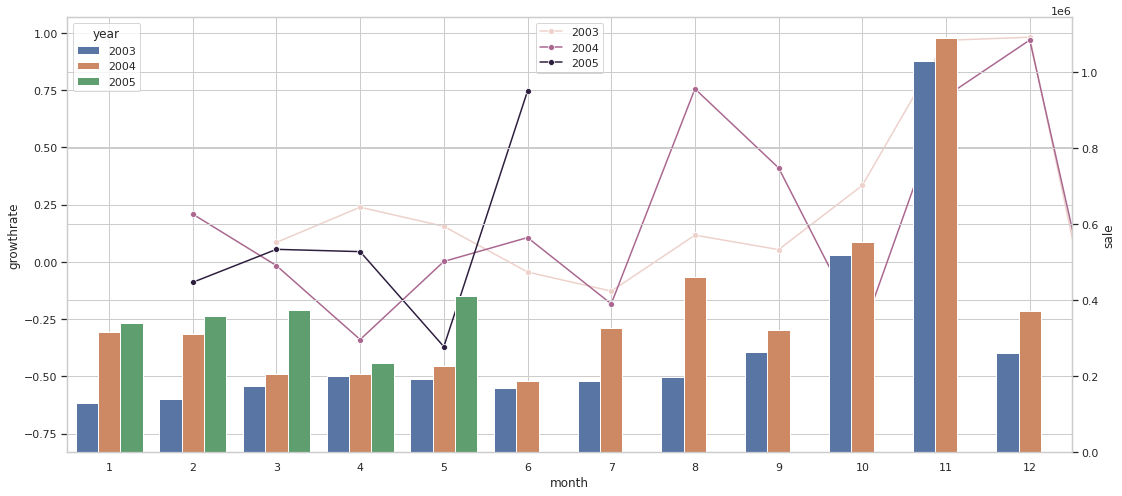

In [729]:
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(x='month',y='growthrate',marker='o',hue='year',ax=ax,data=salesgrowth)
ax.legend(['2003', '2004', '2005'],loc='upper center')
ax1=ax.twinx()
sns.barplot(x='month',y='sale',data=salesgrowth,ax=ax1,hue='year')

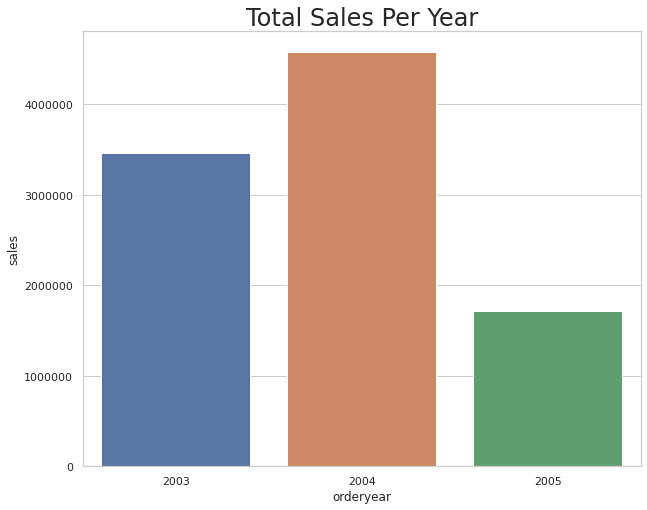

In [730]:
# calculate year Sales

sales_per_year=df.groupby('orderyear')[['sales','quantityordered']].sum().reset_index()
sales_per_year
plt.figure(figsize=(10,8))
sns.barplot(y=sales_per_year.sales,x=sales_per_year.orderyear)
plt.title('Total Sales Per Year',fontsize=24)
plt.ticklabel_format(style='plain', axis='y')

In [731]:
# Plot year Sales versus Quantity Order

bar_data1 = go.Bar(
          x = sales_per_year['orderyear'],
          y = sales_per_year['sales'],
          name = 'Sales',
          text = sales_per_year['sales'],
          texttemplate = '%{text:.2s}',
          textposition = 'inside',
          yaxis = 'y1',
          marker=dict(color=' #7F8C8D'),
          customdata=sales_per_year[['orderyear', 'sales', 'quantityordered']],
          hovertemplate =
          '<br><b>Year</b>: %{customdata[0]}<br><extra></extra>'+
          '<b>Sales</b>: $%{customdata[1]:,.0f}'
          )

line_data2 = go.Scatter(
          x = sales_per_year['orderyear'],
          y = sales_per_year['quantityordered'],
          name = 'Quantity Ordered',
          text = sales_per_year['quantityordered'],
          mode = 'markers + lines',
          yaxis = 'y2',
          marker=dict(color='#DC7633 '),
          customdata=sales_per_year[['orderyear', 'sales', 'quantityordered']],
          hovertemplate =
          '<br><b>Year</b>: %{customdata[0]}<br><extra></extra>'+
          '<b>Quantity Ordered</b>: %{customdata[2]:,.0f}'
          )

data = [bar_data1, line_data2]

layout = go.Layout(title={
                         'text': 'Yearly Sales and Quantity Ordered',
                          'y': 0.93,
                          'x': 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   titlefont={'family': 'Oswald', 
                              'color': 'rgb(230, 34, 144)',
                              'size': 25},
                              hovermode='x',
                              height=550,
                     xaxis=dict(title='<b>Year</b>',
                            tick0=0,
                            dtick=1,
                            color='rgb(230, 34, 144)',
                            showline=True,
                            showgrid=True,
                            showticklabels=True,
                            linecolor='rgb(104, 204, 104)',
                            linewidth=2,
                            ticks='outside',
                            tickfont=dict(family='Arial',
                                size=12,
                                color='rgb(17, 37, 239)')
                            ),

                    yaxis=dict(title='<b>Total Sales </b>',
                        color='rgb(230, 34, 144)',
                        showline=True,
                        showgrid=True,
                        showticklabels=True,
                        linecolor='rgb(104, 204, 104)',
                        linewidth=2,
                        ticks='outside',
                        tickfont=dict(family='Arial',
                            size=12,
                            color='rgb(17, 37, 239)')
                        
                        ),
                 yaxis2=dict(title='<b>Total Quantity Ordered</b>', 
                             overlaying='y', side='right',
                             color='rgb(230, 34, 144)',
                             showline=True,
                             showgrid=False,
                             showticklabels=True,
                            linecolor='rgb(104, 204, 104)',
                            linewidth=2,
                            ticks='outside',
                            tickfont=dict(family='Arial',
                                         size=12,
                                        color='rgb(17, 37, 239)') 
                            )
)

            
figure=go.Figure(data=data, layout=layout)

figure.show()

In [732]:
# Average Sales Each Month.


average_sales_per_month=df.groupby(['orderyear','ordermonth']).agg({'sales':np.mean}).reset_index()
average_sales_per_month


,orderyear,ordermonth,sales
0,2003,1,3327.015385
1,2003,2,3435.029024
2,2003,3,3490.098000
3,2003,4,3476.026724
4,2003,5,3321.950172
5,2003,6,3653.968696
6,2003,7,3754.637600
7,2003,8,3410.505172
8,2003,9,3473.333684
9,2003,10,3659.014437


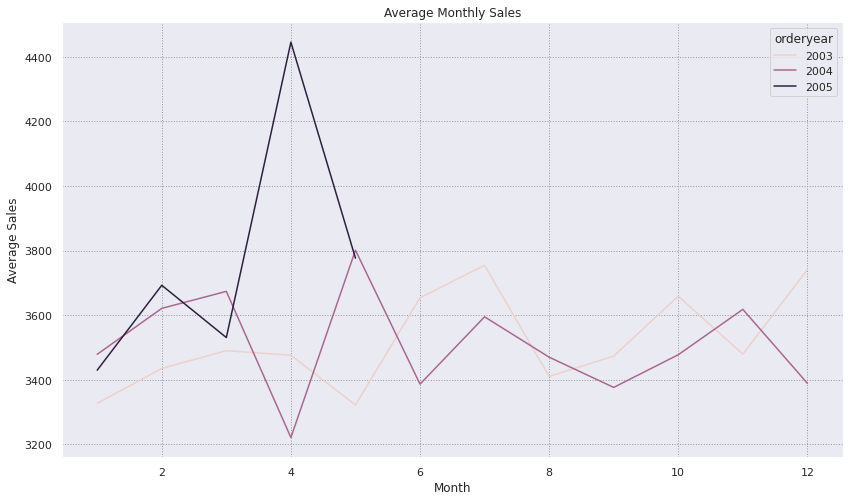

In [733]:
plt.figure(figsize=(14,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x='ordermonth',y='sales',data=average_sales_per_month,hue='orderyear')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

**SECTION 2B.  
CUSTOMER ANALYSIS**

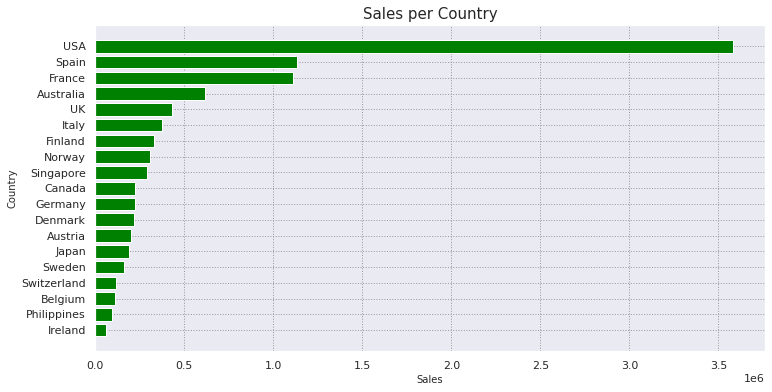

In [734]:
# Calculate the Top 20 Countries

sales_per_country=df.groupby('country')['sales'].sum()
sales_per_country.sort_values(ascending=True,inplace=True)
sales_per_country=sales_per_country.reset_index()
sales_per_country['sales']=sales_per_country['sales'].round(0)
sales_per_country


fig = plt.figure(figsize=(12,6))
plt.barh(sales_per_country['country'],sales_per_country['sales'],color='green')
plt.xlabel('Sales',fontsize=10)
plt.ylabel('Country',fontsize=10)
plt.title("Sales per Country",fontsize=15)
plt.show()

In [735]:
df.head(3)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,ordermonth,orderyear,status,qtr_id,productline,msrp,productcode,customername,phone,addressline1,city,state,postalcode,country,contactlastname,contactfirstname,dealsize,quarter
0,10107,30,95.70,2,2871.00,2003-02-24,2,2003,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small,Q1
1,10121,34,81.35,5,2765.90,2003-05-07,5,2003,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul,Small,Q2
2,10134,41,94.74,2,3884.34,2003-07-01,7,2003,Shipped,3,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,Da Cunha,Daniel,Medium,Q3


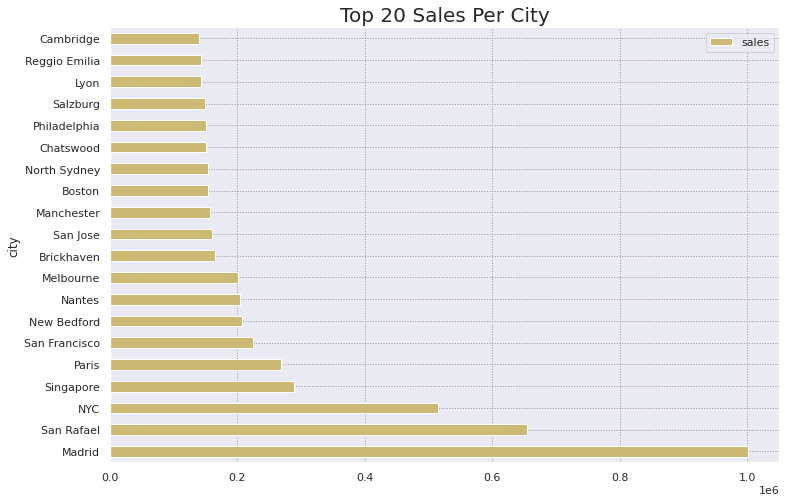

In [736]:
# Calculate TOP 20 Sales Per  City.

sales_per_city=pd.pivot_table(df,values=['sales'],index='city',aggfunc=np.sum)
sales_per_city=sales_per_city.sort_values(by='sales',ascending=False)[:20]
sales_per_city=sales_per_city.plot(kind='barh',figsize=(12,8),color='y')
plt.title('Top 20 Sales Per City',fontsize=20)
plt.show()

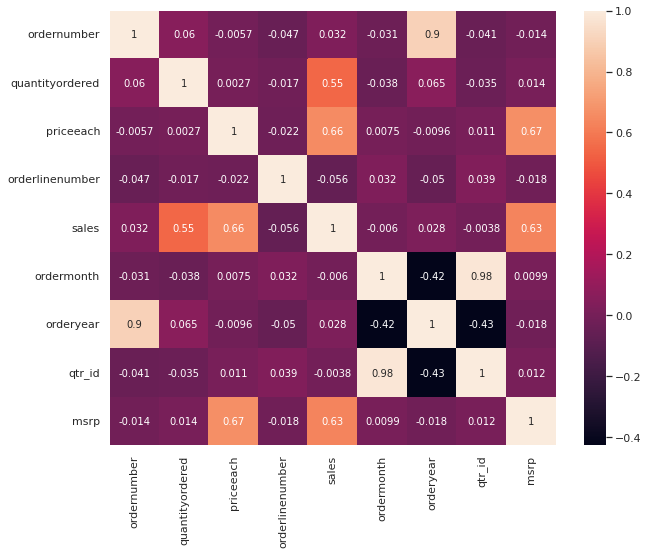

In [737]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cbar=True,annot=True)
plt.show()

In [738]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,ordermonth,orderyear,status,qtr_id,productline,msrp,productcode,customername,phone,addressline1,city,state,postalcode,country,contactlastname,contactfirstname,dealsize,quarter
0,10107,30,95.70,2,2871.00,2003-02-24,2,2003,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small,Q1
1,10121,34,81.35,5,2765.90,2003-05-07,5,2003,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul,Small,Q2
2,10134,41,94.74,2,3884.34,2003-07-01,7,2003,Shipped,3,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,Da Cunha,Daniel,Medium,Q3
3,10145,45,83.26,6,3746.70,2003-08-25,8,2003,Shipped,3,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Young,Julie,Medium,Q3
4,10159,49,100.00,14,5205.27,2003-10-10,10,2003,Shipped,4,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,Brown,Julie,Medium,Q4


# **SECTION 3. MACHINE LEARNING MODELS**

1.   Customer Segmentation.

2.   Time series.

3.   PCA




In [739]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,ordermonth,orderyear,status,qtr_id,productline,msrp,productcode,customername,phone,addressline1,city,state,postalcode,country,contactlastname,contactfirstname,dealsize,quarter
0,10107,30,95.70,2,2871.00,2003-02-24,2,2003,Shipped,1,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small,Q1
1,10121,34,81.35,5,2765.90,2003-05-07,5,2003,Shipped,2,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul,Small,Q2
2,10134,41,94.74,2,3884.34,2003-07-01,7,2003,Shipped,3,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,Da Cunha,Daniel,Medium,Q3
3,10145,45,83.26,6,3746.70,2003-08-25,8,2003,Shipped,3,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Young,Julie,Medium,Q3
4,10159,49,100.00,14,5205.27,2003-10-10,10,2003,Shipped,4,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,Brown,Julie,Medium,Q4


## **Customer Segmentation**

We will use the RFM Model for customer value

1.   Recency:         The value of how recently a customer purchased at the      establishment
2.   Frequency:      How frequent the customer’s transactions are at the establishment
3.	 Monetary value:   value of all the transactions that
the customer made at the establishment
**bold text**



In [740]:
#Create  a function to calculate the RFM model table

def create_rfm_model(dtframe):

    # Calculation of Recency.

    df_recency=df.groupby(by='customername',as_index= False)['orderdate'].max()
    df_recency.columns = ['CustomerName', 'LastPurchaseDate']
    recent_date = df_recency['LastPurchaseDate'].max()
    df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
    

    # Calculation of Frequency

    frequency_df = df.drop_duplicates().groupby(
      by=['customername'], as_index=False)['orderdate'].count()
    frequency_df.columns = ['CustomerName', 'Frequency']

    # Calculating the monetary Value

    monetary_df=df.groupby(by=['customername'],as_index=False)['sales'].sum()
    monetary_df.columns=['CustomerName','Monetary_Value']

    # Merge the rfm pd tables

    rfm_df=pd.merge(df_recency,frequency_df,on='CustomerName',how='left')
    rfm_df=pd.merge(rfm_df,monetary_df, on='CustomerName',how='left').drop(columns ='LastPurchaseDate')

    return rfm_df

rfm_df=create_rfm_model(df)
rfm_df


,CustomerName,Recency,Frequency,Monetary_Value
0,"AV Stores, Co.",195,51,157807.81
1,Alpha Cognac,64,20,70488.44
2,Amica Models & Co.,264,26,94117.26
3,"Anna's Decorations, Ltd",83,46,153996.13
4,Atelier graphique,187,7,24179.96
...,...,...,...,...
87,"Vida Sport, Ltd",274,31,117713.56
88,Vitachrome Inc.,207,25,88041.26
89,"Volvo Model Replicas, Co",193,19,75754.88
90,West Coast Collectables Co.,488,13,46084.64


In [741]:
# Formulate a ranking model for the RFM table

rfm_df['Rrank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['Frank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['Mrank'] = rfm_df['Monetary_Value'].rank(ascending=True)

# normalizing the rank of the customers

rfm_df['R_rank_norm'] = (rfm_df['Rrank']/rfm_df['Rrank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['Frank']/rfm_df['Frank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['Mrank']/rfm_df['Mrank'].max())*100
 
rfm_df.drop(columns=['Rrank', 'Frank', 'Mrank'], inplace=True)
 
rfm_df.head()


,CustomerName,Recency,Frequency,Monetary_Value,R_rank_norm,F_rank_norm,M_rank_norm
0,"AV Stores, Co.",195,51,157807.81,45.355191,95.652174,92.391304
1,Alpha Cognac,64,20,70488.44,79.781421,30.434783,27.173913
2,Amica Models & Co.,264,26,94117.26,19.672131,56.521739,58.695652
3,"Anna's Decorations, Ltd",83,46,153996.13,76.502732,91.847826,91.304348
4,Atelier graphique,187,7,24179.96,52.459016,2.173913,2.173913


In [742]:
# Calcaluting the RFM SCORE

# Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57

rfm_df['rfm_score'] = 0.15*rfm_df['R_rank_norm']+ 0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['rfm_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'rfm_score']].head(4)



,CustomerName,rfm_score
0,"AV Stores, Co.",4.31
1,Alpha Cognac,1.80
2,Amica Models & Co.,2.61
3,"Anna's Decorations, Ltd",4.46


In [743]:
# Rate Customer Based on the RFM Score

# rfm score >4.5 : Top Customer
# 4.5 > rfm score > 4 : High Value Customer
# 4> rfm score >3 : Medium value customer
# 3>  rfm score> 1.6 : Low-value customer
# rfm score< 1.6 :Lost Customer

rfm_df['customer segment']=rfm_df['rfm_score'].apply(lambda x :'Top Customer' if x>=4.5 else('High Value Customer'\
                           if (x<4.5 and x>=4) else ('Medium Value Customer' if (x<4 and x>=3) \
                          else ('Low Level Customer' if(x<3 and x>=1.6) else 'Lost Customer'))))
rfm_df

,CustomerName,Recency,Frequency,Monetary_Value,R_rank_norm,F_rank_norm,M_rank_norm,rfm_score,customer segment
0,"AV Stores, Co.",195,51,157807.81,45.36,95.65,92.39,4.31,High Value Customer
1,Alpha Cognac,64,20,70488.44,79.78,30.43,27.17,1.80,Low Level Customer
2,Amica Models & Co.,264,26,94117.26,19.67,56.52,58.70,2.61,Low Level Customer
3,"Anna's Decorations, Ltd",83,46,153996.13,76.50,91.85,91.30,4.46,High Value Customer
4,Atelier graphique,187,7,24179.96,52.46,2.17,2.17,0.49,Lost Customer
...,...,...,...,...,...,...,...,...,...
87,"Vida Sport, Ltd",274,31,117713.56,17.49,71.20,75.00,3.27,Medium Value Customer
88,Vitachrome Inc.,207,25,88041.26,38.25,48.91,54.35,2.52,Low Level Customer
89,"Volvo Model Replicas, Co",193,19,75754.88,48.09,26.09,35.87,1.75,Low Level Customer
90,West Coast Collectables Co.,488,13,46084.64,3.28,9.24,9.78,0.43,Lost Customer


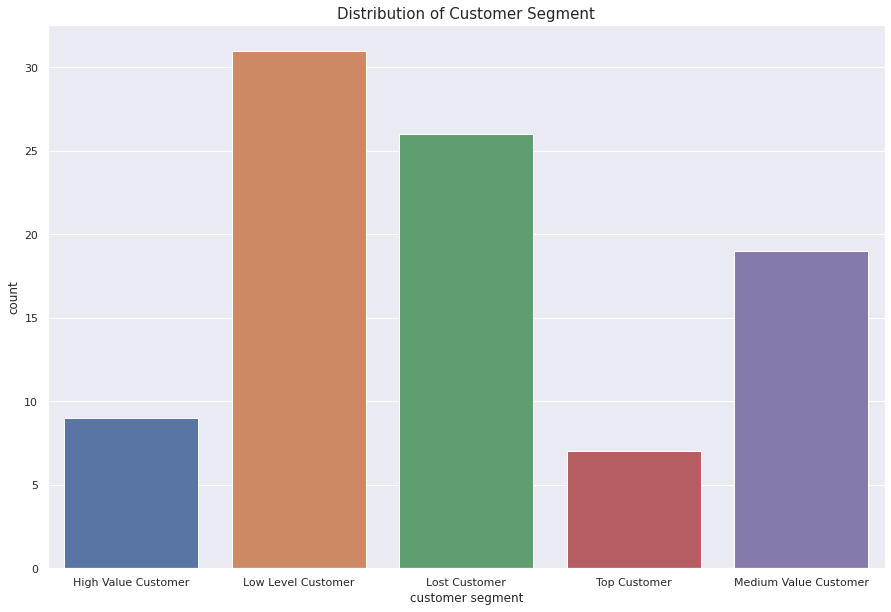

In [744]:
# Customer Segmentation 

rfmd_df=rfm_df[['CustomerName','rfm_score','customer segment']]

plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
sns.countplot(x=rfm_df['customer segment'])
plt.title('Distribution of Customer Segment',fontsize=15)
plt.show()

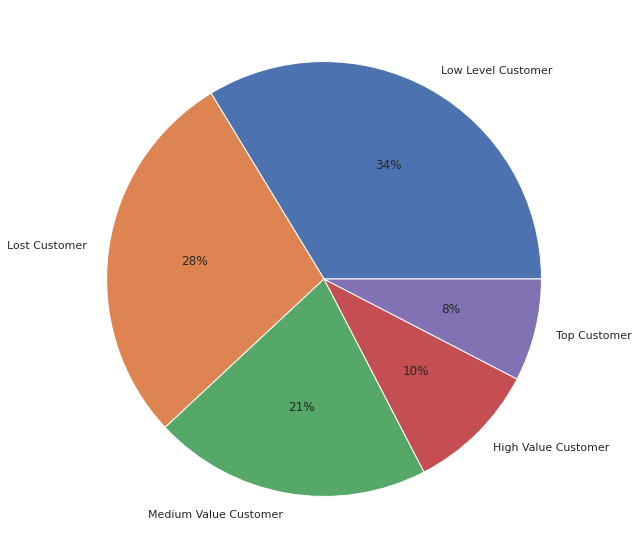

In [745]:
plt.figure(figsize=(14,10))
plt.pie(rfm_df['customer segment'].value_counts(),
        labels=rfm_df['customer segment'].value_counts().index,
        autopct='%.0f%%')

plt.show()

In [746]:
# Table of the Top Customer

rfm_df[rfm_df['customer segment']=='Top Customer'][['CustomerName','rfm_score']].reset_index(drop=True)

,CustomerName,rfm_score
0,"Australian Collectors, Co.",4.56
1,"Dragon Souveniers, Ltd.",4.51
2,Euro Shopping Channel,5.00
3,La Rochelle Gifts,4.83
4,Mini Gifts Distributors Ltd.,4.92
5,Souveniers And Things Co.,4.57
6,The Sharp Gifts Warehouse,4.51


## **Time Series**

In [747]:
# Subset of the Data to get a time series data----> Year and Sales
dfseries=df.groupby('orderdate')['sales'].sum().reset_index()
dfseries=dfseries.set_index('orderdate')
dfseries.head(5)
# Convert to timeseries object


,sales
orderdate,
2003-01-06,12133.25
2003-01-09,11432.34
2003-01-10,6864.05
2003-01-29,54702.00
2003-01-31,44621.96


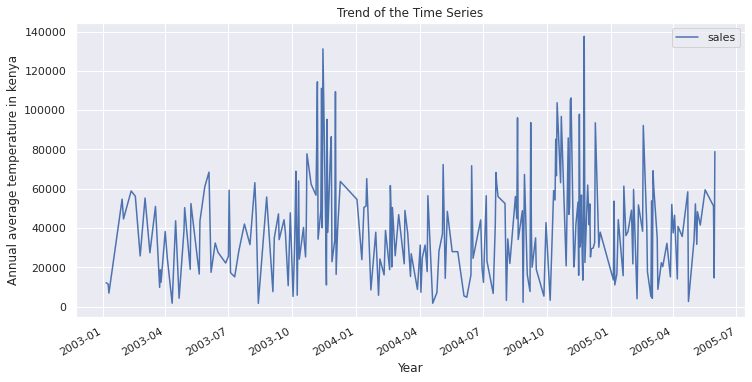

In [748]:
#Plot the time series data to visualize and analysis.

dfseries.plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Annual average temperature in kenya')
plt.title('Trend of the Time Series')
plt.show()

Decompose a time series.

This enable us to visualize the components of time series namely
1. Trend- Increasing or decreasing value in the series.
2. seasonarity- Any repeating cycle
3. Noise Random Variation in the series
4. Level Average value in the series

<Figure size 1080x360 with 0 Axes>

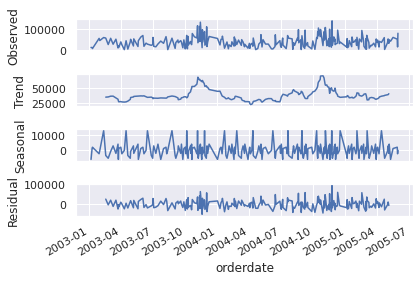

In [749]:
plt.figure(figsize=(15,5))
result = seasonal_decompose(dfseries, model='additive',freq=12)
result.plot()
plt.show()

In [750]:
# Function to check for stationarity

def stationarity_test(timeseries):

    print('RESULTS OF DICKEY-FULLER TEST\n')
    df_test = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
    # df_test = adfuller(timeseries,autolag='AIC')
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)
    print("****************************************************")
    print(f'INFERENCE:         THE TIME SERIES IS {"NON-" if df_test[1]>=0.05 else ""}STATIONARY')

stationarity_test(df)

RESULTS OF DICKEY-FULLER TEST

Test Statistic                -1.024667e+01
p-value                        4.598470e-18
#Lags Used                     2.800000e+01
Number of Observations Used    2.720000e+03
Critical Value (1%)           -3.432756e+00
Critical Value (5%)           -2.862603e+00
Critical Value (10%)          -2.567336e+00
dtype: float64
****************************************************
INFERENCE:         THE TIME SERIES IS STATIONARY


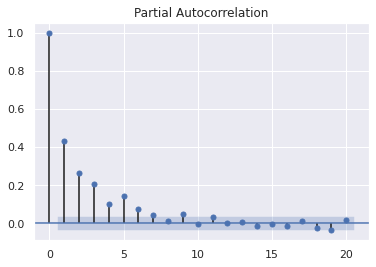

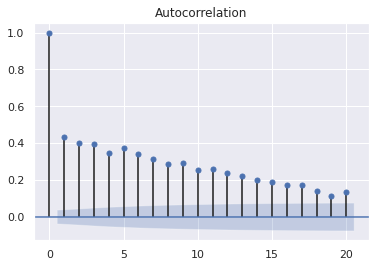

In [751]:
 #Determine P and Q by Plotting the ACF AND PACF

def plot_acf_pcf(ts_data):
  plot_pacf(df['sales'],lags=20)
  plot_acf(df['sales'],lags=20)

plot_acf_pcf(dfseries)


In [752]:
# Split time series data set into two : the train and test data set.

# Split the data into train and test
train=dfseries.iloc[:200]
test=dfseries.iloc[200:]
print(f'dfseries shape is {dfseries.shape}')
print(f'dfseries shape is {train.shape}')
print(f'dfseries shape is {test.shape}')

dfseries shape is (245, 1)
dfseries shape is (200, 1)
dfseries shape is (45, 1)


In [753]:
pip install pmdarima

In [754]:
# BUILD AN ARIMA MODEL

# Perform auto-ARIMA to choice the best performing combination of (PDQ) parameters checking the one with the least AIC.

import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=2, 
                              start_q=2,
                              test="adf",
                              trace=True)
    return autoarima_model

    
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4648.307, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4650.392, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4651.808, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4652.148, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4886.417, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4648.949, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4649.713, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4647.443, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4649.515, Time=0.11 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=4648.415, Time=0.57 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=4646.252, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=4647.597, Time=0.50 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=4

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -2315.126
Date:                Sun, 16 Jan 2022   AIC                           4646.252
Time:                        20:58:48   BIC                           4672.638
Sample:                             0   HQIC                          4656.930
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.767e+04   1.34e+04      1.322      0.186   -8535.490    4.39e+04
ar.L1          0.2817      0.168      1.679      0.093      -0.047       0.611
ar.L2         -0.4579      0.108     -4.230      0.000      -0.670      -0.246
ar.L3          0.7423      0.135      5.494      0.000       0.477       1.007
ma.L1         -0.2392      0.196     -1.218      0.223      -0.624       0.146
ma.L2          0.5779      0.127      4.564      0.000       0.330       0.826
ma.L3         -0.6241      0.178     -3.507      0.000      -0.973      -0.275
sigma2      6.772e+08      0.436   1.55e+09      0.000    6.77e+08    6.77e+08
===================================================================================
Ljung-Box (Q):                       36.18   Jarque-Bera (JB):                23.72
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                             0.80
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.2e+25. Standard errors may be unstable.
"""

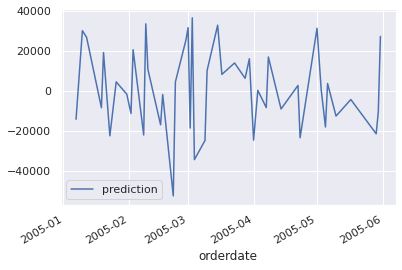

In [755]:

arima_model1 = sm.tsa.ARIMA(dfseries['sales'], order=(3,1,3))
arima_model1 = arima_model1.fit()

# Make Predict on Test data

start=len(train)
end=len(train)+len(test)-1
pred=arima_model1.predict(start=start,end=end).rename('prediction')
pred.head(3)
pred.plot(legend=True)

36712.29666666667


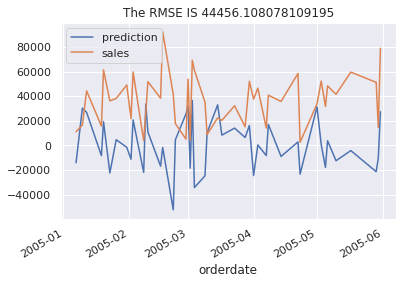

In [756]:
# Plot predict vs Actual
pred.plot(legend=True)
test['sales'].plot(legend=True)
rmse=sqrt(mean_squared_error(pred,test['sales']))
plt.title(f'The RMSE IS {rmse}')
print(test['sales'].mean())

In [757]:
# Make Future Predictions
arima_model2 = sm.tsa.ARIMA(dfseries['sales'], order=(2,1,2))
arima_model2 = arima_model2.fit()

pred2=arima_model2.predict(start=len(dfseries),end=len(dfseries)+10,typ='levels').rename('ARIMA PREDICTIONS')
print(pred2)


244    37245.985583
245    45956.142399
246    39804.660353
247    45663.764039
248    40151.001463
249    45538.087382
250    40468.720373
251    45431.054462
252    40769.144685
253    45340.573952
254    41053.691558
Name: ARIMA PREDICTIONS, dtype: float64


##Principal Component Analysis (PCA)

In [758]:
# PCA
cols = ['quantityordered', 'priceeach', 'sales', 'orderyear']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(df[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [759]:
X_pca.shape

(2749, 4)

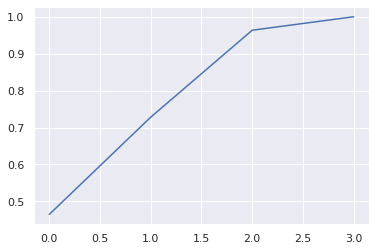

In [760]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [761]:
# Find columns that most influence components

comps = pd.DataFrame(pca.components_, columns=X.columns)
pca_cols = set()
num_comps = 2
for i in range(num_comps):
    parts = comps.iloc[i][comps.iloc[i].abs() > .2]
    pca_cols.update(set(parts.index))
pca_cols

{'orderyear', 'priceeach', 'quantityordered', 'sales'}

In [762]:
# How original columns impact each component
(pd.DataFrame(pca.components_, columns=X.columns)
 .loc[:,list(pca_cols)]
 .T
 .style.background_gradient(cmap='RdBu', axis=0)
)

,0,1,2,3
priceeach,0.542289,-0.468778,0.435430,-0.544582
orderyear,0.051005,0.707652,0.704699,0.005096
quantityordered,0.453370,0.527803,-0.559572,-0.450288
sales,0.705532,-0.030006,-0.026050,0.707563


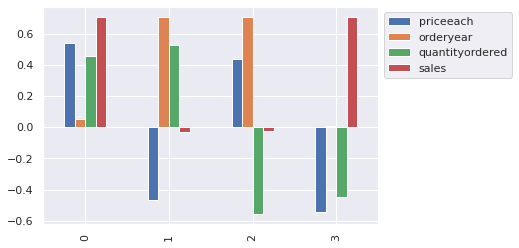

In [763]:
# visualize amount
comps = pd.DataFrame(pca.components_, columns=X.columns)
comps[list(pca_cols)].iloc[:7].plot.bar().legend(bbox_to_anchor=(1,1))

# **SECTION 4. Conclusion**

The outcome of the analysis is suprising at the beginning of this project it was difficult to pick any trends by just observating the data.\
Below are some of the conclusion drawn from the analysis.
*italicised text*
**Product**
1. Classic cars and Vintage cars product line are the main favourite products.
2. 2004 was the best year in terms of sales revenue.
3. Every year they is a huge spike in sales revenue in the months of oxctober and November.

**Customer**
4. we have managed to segment the customer based on RFM model and the results is that 38% of the customer are low level and 28% are lost customer, they is a need for the company to improve on the Customer relationship Management this will enable them to attract new customer prospect , retain customer and grow the business by  cross selling and up selling.

5. USA , France and Spain are the major markets for the Company. They is a need to grow the business in other markets, further analysis is needed to derive insight why business in USA FRANCE and SPAIN is huge. This information can be used to improvement market share in other countries.


The most important part of the analysis is to insight derived by customer segmentation this is a variable information if actions are taken around it it can improve the overall growth of the business.